In [19]:
import numpy as np

m, n = 2, 3
A = np.random.rand(m, n)
U, S, V = np.linalg.svd(A, full_matrices=True)
print('A =', A)

# Check if U, V are orthogonal and S is a diagonal matrix with nonnegative decreasing value
print('U=', U)
print('Frobenius norm of (UU^T - I):', np.linalg.norm(U.dot(U.T) - np.eye(m)))
print('S =', S)
print('V=', V) # V = V^T in theory
print('Frobenius norm of (VV^T - I):', np.linalg.norm(V.dot(V.T) - np.eye(n)))
Sigma = np.zeros_like(A)
Sigma[:m, :m] = np.diag(S)
print('Sigma =', Sigma)
print('U.Sigma.V =', U.dot(Sigma).dot(V))

A = [[0.30889822 0.01309464 0.56945911]
 [0.75780468 0.91950012 0.02380278]]
U= [[ 0.23713648  0.97147635]
 [ 0.97147635 -0.23713648]]
Frobenius norm of (UU^T - I): 8.247319925090595e-16
S = [1.2180733  0.59706421]
V= [[ 0.66452516  0.73589811  0.12984717]
 [ 0.20162685 -0.34389247  0.91710664]
 [-0.7195505   0.58325976  0.37690202]]
Frobenius norm of (VV^T - I): 7.19815062407891e-16
Sigma = [[1.2180733  0.         0.        ]
 [0.         0.59706421 0.        ]]
U.Sigma.V = [[0.30889822 0.01309464 0.56945911]
 [0.75780468 0.91950012 0.02380278]]


# Image Compression

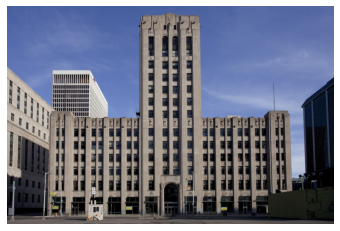

In [20]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

img = mpimg.imread('building2.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

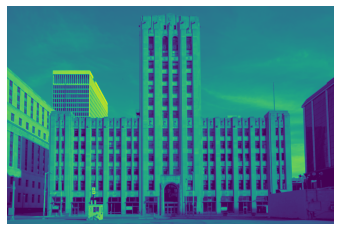

In [21]:
# to gray 
gray = 0.2125* img[:, :, 0] + 0.7154 *img[:, :, 1] + 0.0721 *img[:, :, 2]
plt.imshow(gray)
plt.axis('off')
plt.show()

(960, 960) (960,) (1440, 1440)


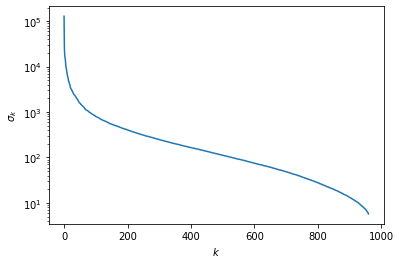

In [27]:
U, S, V = np.linalg.svd(gray) # U.shape = (960, 960), S.shape = (960,), V.shape = (1440, 1440)
print(U.shape, S.shape, V.shape)

plt.semilogy(S) 
plt.xlabel('$k$')
plt.ylabel('$\sigma_k$')
plt.show()

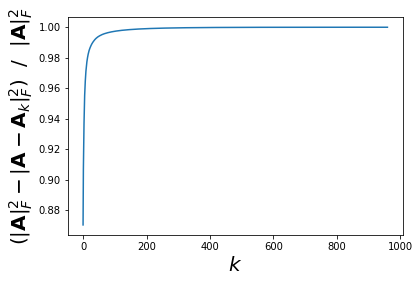

In [30]:
# percentage of preserving energy

a = np.sum(S**2)
b = np.zeros_like(S)
for i in range(S.shape[0]):
    b[i] = np.sum(S[:i+1]**2, axis = 0)/a
    
plt.plot(b)
plt.xlabel('$k$', fontsize = 20)
plt.ylabel('$(\|\mathbf{A}\|_F^2 - \|\mathbf{A} - \mathbf{A}_k\|_F^2)$  /  $\|\mathbf{A}\|_F^2$', fontsize = 20)
plt.show()

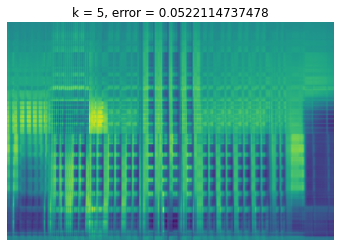

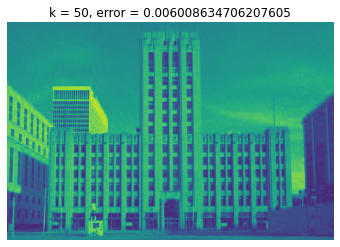

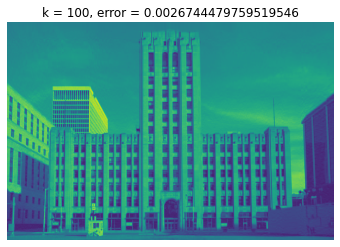

In [39]:
# truncated SVD
def approx_rank_k(U, S, V, k):
    Uk = U[:, :k]
    Sk = S[:k]
    Vk = V[:k, :]
    return np.around(Uk.dot(np.diag(Sk)).dot(Vk))

e = 1 - b

img1 = approx_rank_k(U, S, V, 5)
plt.imshow(img1)
plt.axis('off')
plt.title('k = 5, error = ' + str(e[4]))
plt.show()

img2 = approx_rank_k(U, S, V, 50)
plt.imshow(img2)
plt.axis('off')
plt.title('k = 50, error = ' + str(e[49]))
plt.show()

img3 = approx_rank_k(U, S, V, 100)
plt.imshow(img3)
plt.axis('off')
plt.title('k = 100, error = ' + str(e[99]))
plt.show()
